Import the necessary libraries to perform the processing and plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Load and isolate the Gender column needed for the bivariant analysis.

In [2]:
raw_data = pd.read_csv("./data/raw_data.csv")

gender_data = raw_data['Gender']

Find the mode of the data and prepare it to replace missing data with the mode.

In [3]:
mode = gender_data.mode().values[0]
if mode == "Male":
    mode = 0
elif mode == "Female":
    mode = 1
else: mode = 2

Encode the Gender column to save space and improve processing speeds.

In [4]:
le = LabelEncoder()
encoded_gender = le.fit_transform(gender_data)

Replace every instance of missing data (transformed to 2) with the mode of the data (in this case Male or 0 after encoded).

In [5]:
encoded_gender = np.where(encoded_gender == 2, mode, encoded_gender)

Now we can continue to count the number of each instance of Male(489) or Female(125) = 614.

In [6]:
a = np.array(encoded_gender)
b = np.unique(a, return_counts=True)
male_totals = b[1][1]
female_totals = b[1][0]
gender_totals = male_totals, female_totals

This line of code creates a crosstabulation to summarize the loan counts by gender and loan status.

In [7]:
gender_loan_counts = pd.crosstab(raw_data['Gender'], raw_data['Loan_Status'])

Plot the data using a bar graph.

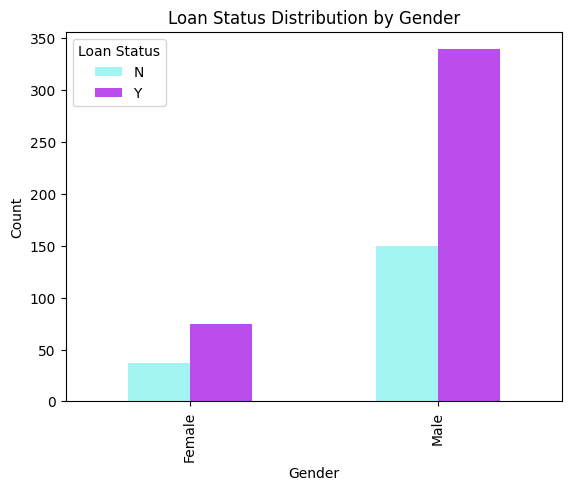

In [8]:
gender_loan_counts.plot(kind='bar', stacked=False, color= ['#A3F5F3', '#BB4DED'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Status Distribution by Gender')

plt.legend(title='Loan Status')
plt.show()

As we can see from the bar graph, you are more likely to be given a loan if you are a male. I would like to mention however, that the data may be biased towards males since they are the prodominant category from the Gender column.